# Demo with Synthetic Data

In this demo, we are going to use synethic data instead of materials science data.  The point of the demo is to gain a better intuition of the data analytics available on Citrination.

## Step 1: Generate Synthetic Data

In this case, I'm going to generate data that has 4 clusters. There are four input columns in X.  The output, Y, has a different value for each cluster. 

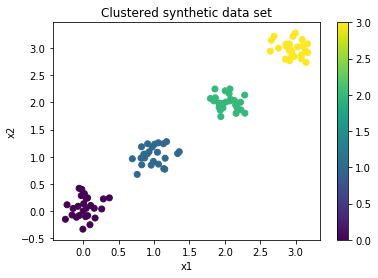

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_clusters(num_points=1000, num_features=2):
    num_clusters = 4
    X = np.zeros((1, num_features))
    Y = np.zeros((1, 1))
    for i in range(num_clusters):
        x = np.random.randn(num_points/num_clusters, num_features)/6.0+i
        X = np.vstack((X, x))
        y = np.ones((num_points/num_clusters, 1))*i
        Y = np.vstack((Y, y))
    return X, Y

def write_cluster_csv(filename, x, y):
    data = np.hstack((x, y))
    num_features = x.shape[1]
    str1 = ""
    for i in range(num_features):
        str1 += "x" + str(i) +","
    str1 += "y"
    np.savetxt(filename, data, delimiter=',', header=str1, comments="", fmt="%.5e")

x, y = create_clusters(100, 4)
write_cluster_csv("cluster_data.csv", x, y)
plt.scatter(x[:, 0], x[:, 1], c=y[:,0])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Clustered synthetic data set")
plt.colorbar()
plt.show()

## Step 2: Upload data

In this case, I'm going to upload the data using the CSV to Dataset button at https://citrination.com/datasets

I specify that x0, x1, x2, x3 and y are all properties.

I save the data set here: https://citrination.com/datasets/151397



## Step 3: Create DataView

- Click on the dataview tab, and create a new data view.  Use the cluster data set that you just created.
- Include all columns (x0, x1, x2, x3 and y)
- Specify that x0, x1, x2, x3 are inputs, and y is an output
- Name and save your DataView

## Step 4: Data Analytics

- This view is instructive because we know where the data came from and how it was generated
- If you click on the Reports tab, then on Data Summary, you can see the correlations plot and the t-SNE plot
- The correlations plot shows that, as expected, y is correlated more or less equally with all the inputs.  

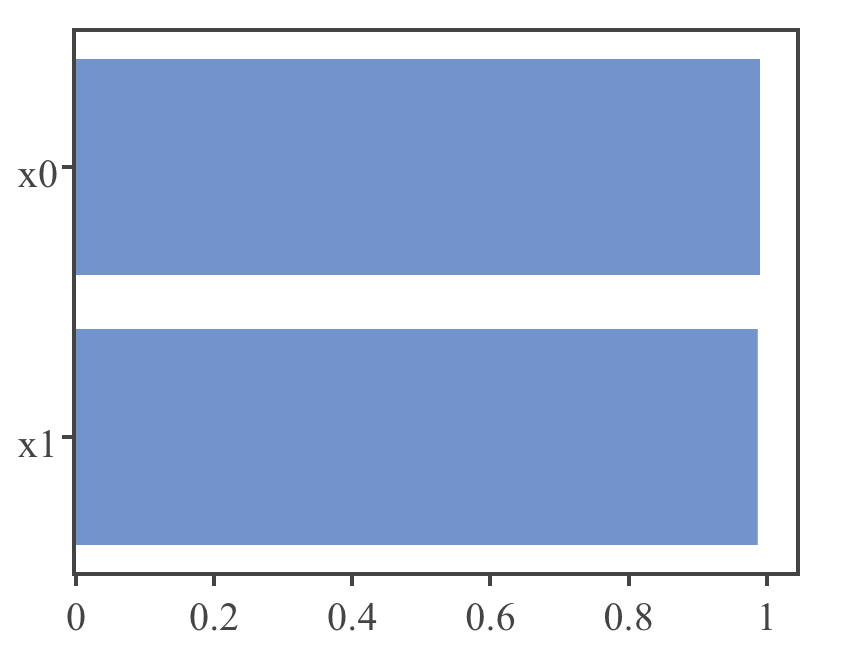

In [6]:
from IPython.display import Image
Image(filename='./SyntheticDataDemo/correlation.png', width=400)

- We can also see that the t-SNE plot shows four clusters.  t-SNE is a dimensionality reduction method that is designed to preserve local distances.  In other words, points that are near each other before t-SNE should still be near each other when projected with t-SNE.  t-SNE is useful for visualizing high-dimensional data.  As you can see, t-SNE preserves the cluster structure.  

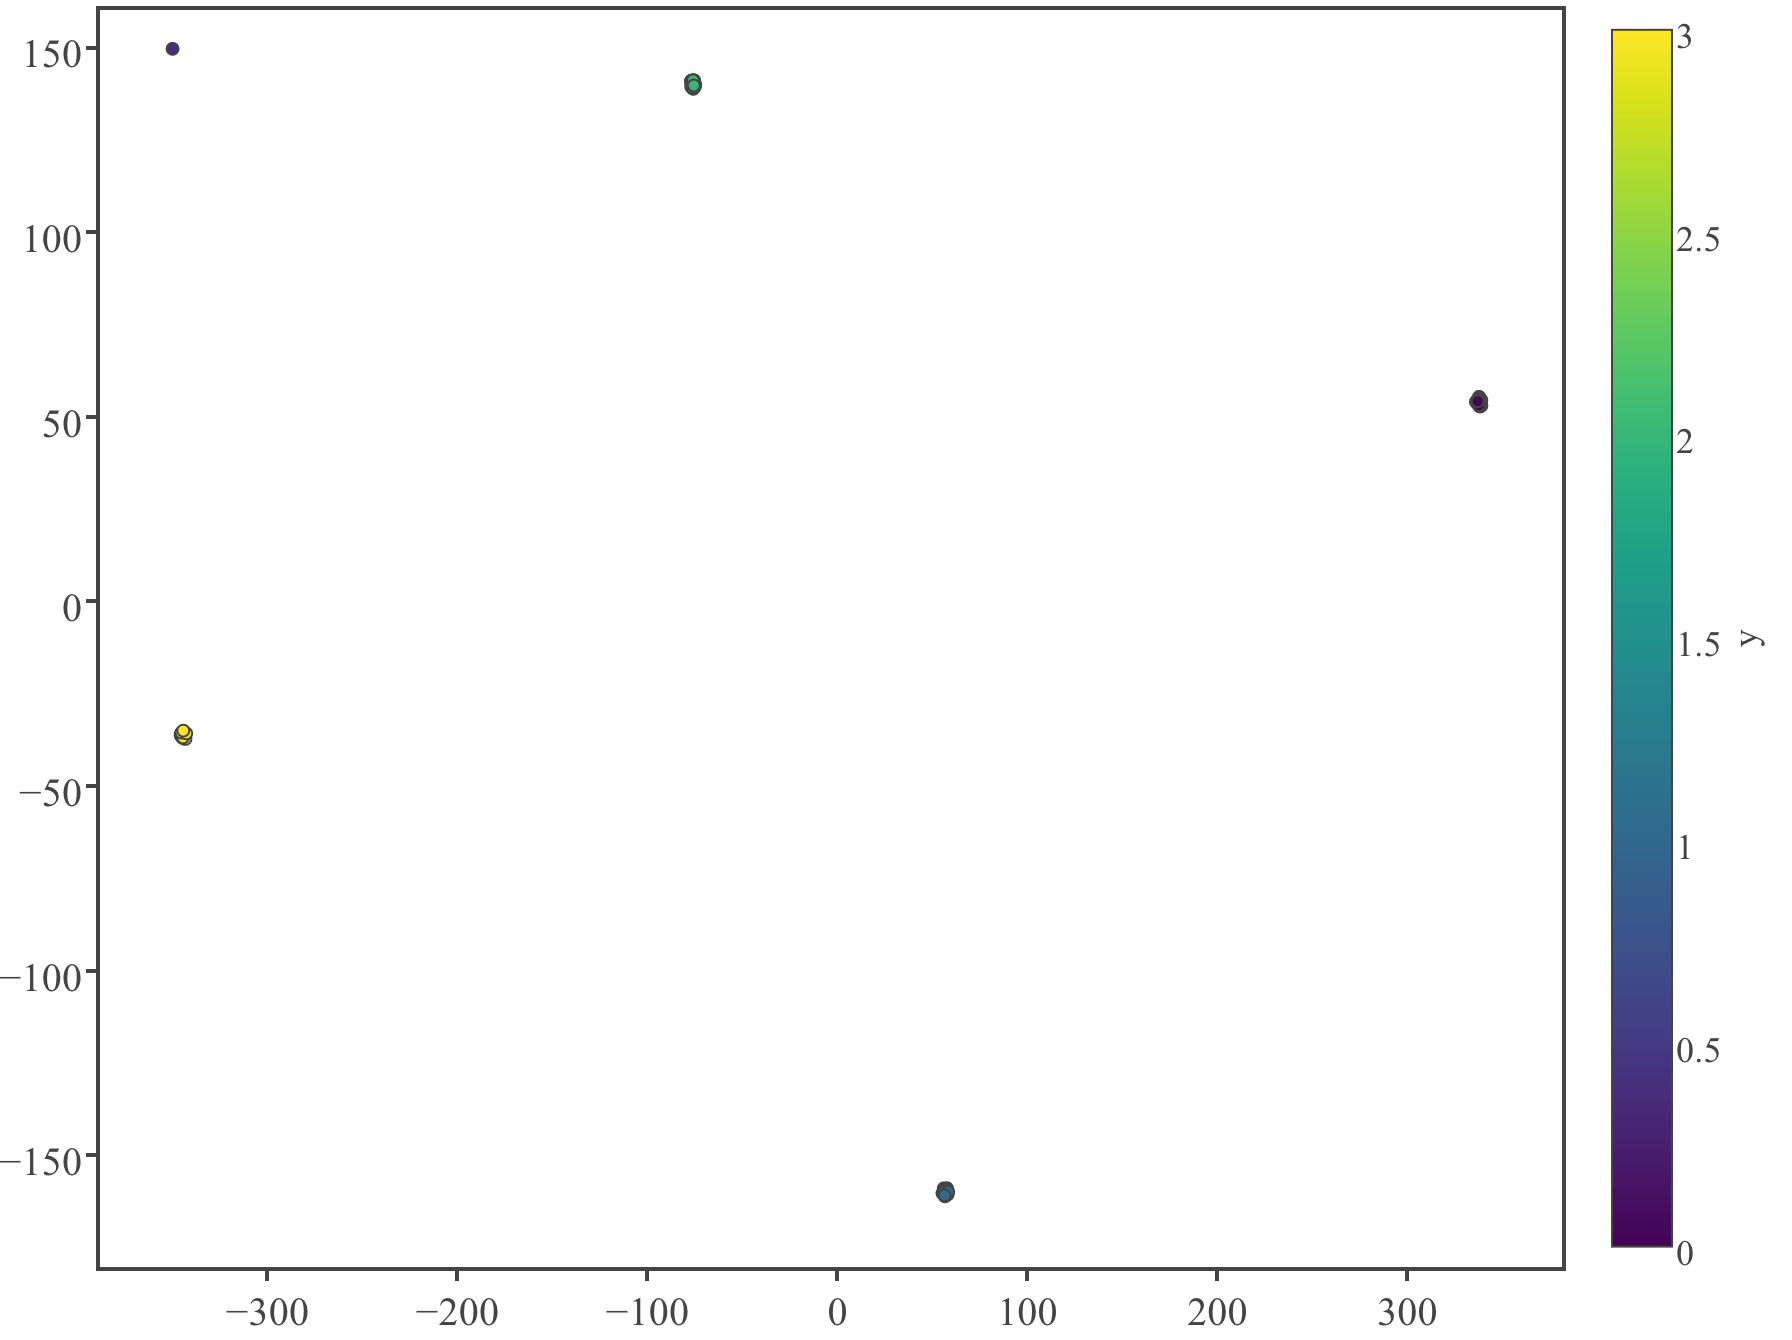

In [8]:
from IPython.display import Image
Image(filename='./SyntheticDataDemo/tsne.png', width=400)

- If we click on the Model Report tab, we can also see that all four inputs have more or less equal feature importance.  This feature importance is an indicator of how important each input was in building a model for the output.  The features all have equal importance because they were all treated equally when the synthetic data was generated. 
- We can also see that the model is able to very accurately predict the correct y value for this very structured data set.

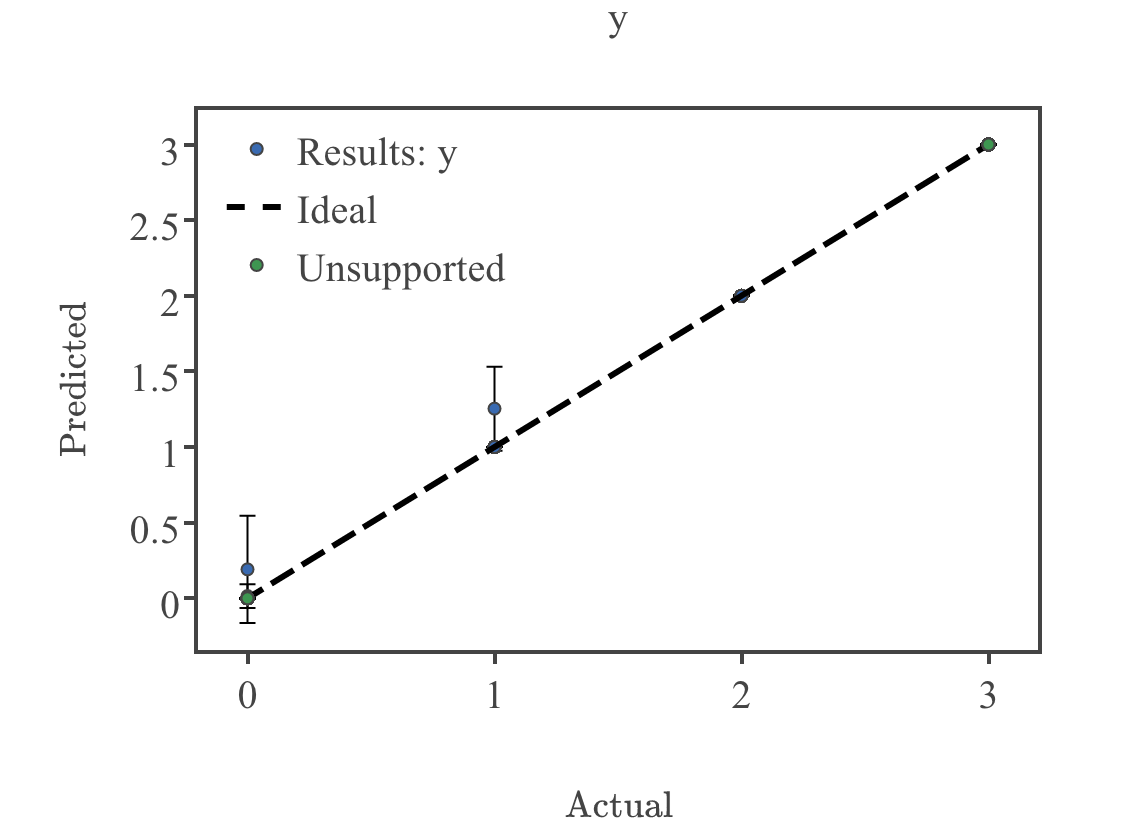

In [9]:
from IPython.display import Image
Image(filename='./SyntheticDataDemo/results.png', width=400)